# Delay and Gap

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
ttc = pd.read_csv('ttc_delays_cleaned.csv')
ttc['Hour'] = pd.to_datetime(ttc['Time'], format='%H:%M').dt.hour
ttc.head()

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle,Station_original,Line_ori,Code Description,Hour
0,1/1/2014,02:06,Wednesday,HIGH PARK,SUDP,3,7,West,Bloor-Danforth,5001.0,HIGH PARK STATION,BD,Disorderly Patron,2
1,1/1/2014,02:40,Wednesday,SHEPPARD,MUNCA,0,0,NaN,Yonge-University,NaN,SHEPPARD STATION,YU,NaN,2
2,1/1/2014,03:10,Wednesday,LANSDOWNE,SUDP,3,8,West,Bloor-Danforth,5116.0,LANSDOWNE STATION,BD,Disorderly Patron,3
3,1/1/2014,03:20,Wednesday,BLOOR,MUSAN,5,10,South,Yonge-University,5386.0,BLOOR STATION,YU,Unsanitary Vehicle,3
4,1/1/2014,03:29,Wednesday,DUFFERIN,MUPAA,0,0,East,Bloor-Danforth,5174.0,DUFFERIN STATION,BD,Passenger Assistance Alarm Activated - No Trou...,3


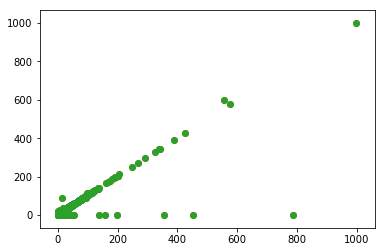

In [35]:
delay_gap = ttc.groupby(['Min Delay','Min Gap']).size()
delay_gap_unstack = delay_gap.unstack()

d_g = ttc[['Min Delay','Min Gap']]

x = delay_gap_unstack.columns.values
y = delay_gap_unstack.index.values
s = delay_gap
x, y, delay_gap

d_g

plt.scatter(d_g['Min Delay'], d_g['Min Gap'])
plt.show()

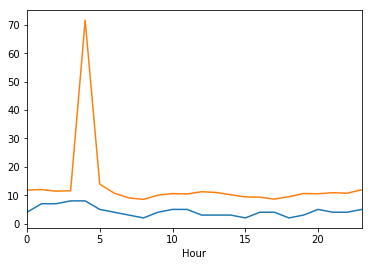

In [69]:
hour_gap = ttc[ttc['Min Gap'] > 0][['Hour','Min Gap']]
# hour_gap.groupby('Hour')['Min Gap'].max().plot()
hour_gap.groupby('Hour')['Min Gap'].min().plot()
hour_gap.groupby('Hour')['Min Gap'].mean().plot()
plt.show()

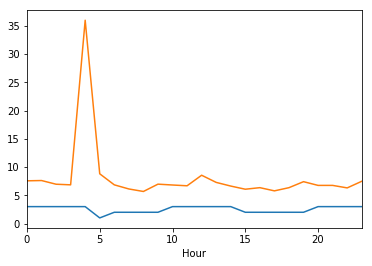

In [73]:
hour_delay = ttc[ttc['Min Delay'] > 0][['Hour','Min Delay']]
# hour_delay.groupby('Hour')['Min Delay'].max().plot()
hour_delay.groupby('Hour')['Min Delay'].min().plot()
hour_delay.groupby('Hour')['Min Delay'].mean().plot()
plt.show()